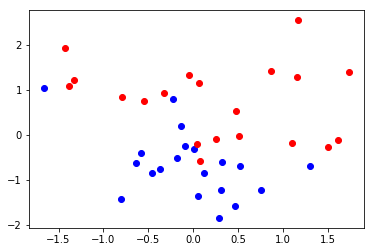

In [6]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

# definition of constant values
n = 40
lam = 1

# create dataset
omega = np.random.randn(1)
noise = 0.8 * np.random.randn(n)
x = np.random.randn(n, 2)
y = np.where(omega * x[:, 0] + x[:, 1] + noise > 0, 1, -1)

# plot dataset
def plot_dataset(show=True, axes=plt):
    for data, label in zip(x,y):
        color= 'b' if label < 0 else 'r'
        axes.plot(data[0], data[1], color+'o')
    if show: plt.show()
        
plot_dataset()

In [7]:
x[:, 0].max()

1.7270577269919025

In [8]:
# declation of variables
w1 = Symbol('w1')
w2 = Symbol('w2')
w = np.array([w1, w2])

# define J(w)
j = sum([log(exp(tmp) + 1) for tmp in -y * np.sum(w * x, axis=1)]) + lam * sum(w * w) 
    

# batch steepest gradient method
def gradient_method(epoch=10, lr=0.2):
    grad = diff(j, w)
    omega = np.ones_like(w)
    js = []
    for step in range(epoch + 1):
        js.append(j.subs([(w1, omega[0]), (w2, omega[1])]))
        print('{} step:\tJ={}\tw={}'.format(step, js[step], omega))
        omega = omega - lr * grad.subs([(w1, omega[0]), (w2, omega[1])])
        
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
    
    axL.plot(np.arange(epoch+1), np.array(js))
    
    axR.set_ylim([x[:, 1].min() - 1, x[:, 1].max() + 1])
    v1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
    v2 = - omega[0] / omega[1] * v1
    axR.plot(v1, v2, 'r-')
    plot_dataset(False, axes=axR)
    
    
# Newton based method
def newton_method(epoch=10):
    omega = np.ones_like(w)
    d1, d2 = Symbol('d1'), Symbol('d2')
    d = np.array([d1, d2])
    js = []
    for step in range(epoch + 1):
        js.append(j.subs([(w1, omega[0]), (w2, omega[1])]))
        print('{} step:\tJ={}\tw={}'.format(step, js[step], omega))
        grad = diff(j, w).subs([(w1, omega[0]), (w2, omega[1])])
        hesian = np.array(diff(j, w, 2).subs([(w1, omega[0]), (w2, omega[1])])).reshape(2, 2)
        omega  += np.array(list(solve(np.dot(hesian, d) + grad).values()))
        
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
    
    axL.plot(np.arange(epoch+1), np.array(js))
    
    axR.set_ylim([x[:, 1].min() - 1, x[:, 1].max() + 1])
    v1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
    v2 = - omega[0] / omega[1] * v1
    axR.plot(v1, v2, 'r-')
    plot_dataset(False, axes=axR)

0 step:	J=19.4896411696205	w=[1 1]
1 step:	J=18.9474414039164	w=[0.319838105292951 1.95299386452760]
2 step:	J=18.0744729200757	w=[0.873839082456415 1.34191054794315]
3 step:	J=17.9376534378248	w=[0.527959005211118 1.68156864069250]
4 step:	J=17.8257870128906	w=[0.762160479229552 1.42716928539231]
5 step:	J=17.7908607974080	w=[0.601425322253666 1.59327264634386]
6 step:	J=17.7684155025856	w=[0.713638711551075 1.47312254294120]
7 step:	J=17.7594748556940	w=[0.635535769457488 1.55492145677887]
8 step:	J=17.7544464284263	w=[0.690282995218267 1.49666279866308]
9 step:	J=17.7522130510609	w=[0.652016629880744 1.53695061838513]
10 step:	J=17.7510398628076	w=[0.678846314239610 1.50848728107639]


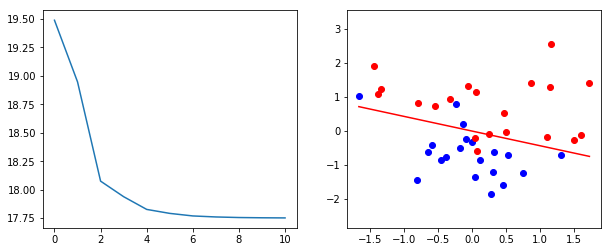

In [9]:
# run the batch steepest gradient method and show the result.
gradient_method()

0 step:	J=19.4896411696205	w=[1 1]
1 step:	J=17.7645755121422	w=[0.658949167220613 1.45212563220945]
2 step:	J=17.7499536120273	w=[0.667554575145393 1.51883683334698]
3 step:	J=17.7499489259198	w=[0.667811099037571 1.52007308528116]
4 step:	J=17.7499489259193	w=[0.667811205201863 1.52007349464706]
5 step:	J=17.7499489259193	w=[0.667811205201876 1.52007349464711]
6 step:	J=17.7499489259193	w=[0.667811205201876 1.52007349464711]
7 step:	J=17.7499489259193	w=[0.667811205201876 1.52007349464711]
8 step:	J=17.7499489259193	w=[0.667811205201876 1.52007349464711]
9 step:	J=17.7499489259193	w=[0.667811205201876 1.52007349464711]
10 step:	J=17.7499489259193	w=[0.667811205201876 1.52007349464711]


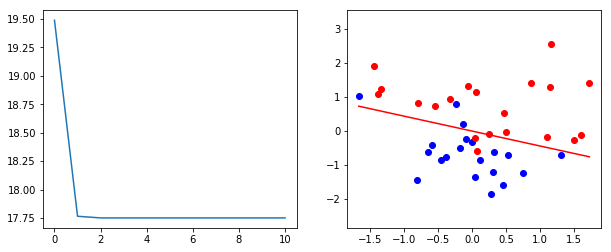

In [10]:
# run the Newton based method and show the result.
newton_method()